In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# RAM
df = pd.DataFrame(pd.read_csv("finetune_deep.csv", sep=",", skiprows=0, header=None))
df.columns= ["step", "loss", "acc_train", "acc_eval"]
df['step'] = df['step'].apply(lambda x: x*100000)
print(df)
#df = pd.DataFrame(pd.read_csv("acc.csv", sep=",", skiprows=1, header=None))
#df.columns= ["step", "acc", "min", "max"]
#df = df.drop(["min", "max"], axis=1)
#print(df)

#df_rand = pd.DataFrame(pd.read_csv("random_acc.csv", sep=",", skiprows=1, header=None))
#df_rand.columns= ["step", "random_acc", "min", "max"]
#df_rand = df_rand.drop(["min", "max"], axis=1)
#print(df_rand)

# Time
#df2 = pd.DataFrame(pd.read_csv("loss.csv", sep=",", skiprows=1, header=None))
#df2.columns= ["step", "loss", "min", "max"]
#df2 = df2.drop(["min", "max"], axis=1)
#print(df2)

       step      loss  acc_train  acc_eval
0         0  0.691110   0.498936  0.502482
1    100000  0.689712   0.498936  0.502482
2    200000  0.687818   0.514386  0.513922
3    300000  0.684864   0.645666  0.596374
4    400000  0.680738   0.675641  0.624002
5    500000  0.674614   0.674901  0.624433
6    600000  0.666991   0.677584  0.631340
7    700000  0.657154   0.677121  0.633931
8    800000  0.644491   0.675733  0.638247
9    900000  0.628983   0.676751  0.641053
10  1000000  0.610695   0.679619  0.644291
11  1100000  0.589989   0.682302  0.646234
12  1200000  0.566654   0.686187  0.644938
13  1300000  0.542409   0.687945  0.645154
14  1400000  0.518837   0.691461  0.644507


In [31]:
df_clean = df
"""
step = []
loss = []
for index, row in df.iterrows():
    if (index%5)==0:
        step.append(df.iloc[index, 0])
        loss.append(df.iloc[index, 1])
df_clean = {"step": step, "acc":loss}
df_clean = pd.DataFrame(df_clean)
print(df_clean)

step = []
loss = []
for index, row in df_rand.iterrows():
    if (index%100)==0:#30
        step.append(df_rand.iloc[index, 0])
        loss.append(df_rand.iloc[index, 1]+0.001) # just to make the line more visible
df_rand_clean = {"step": step, "random_acc":loss}
df_rand_clean = pd.DataFrame(df_rand_clean)
print(df_rand_clean)

step = []
loss = []
for index, row in df2.iterrows():
    if (index%275)==0:#250
        step.append(df2.iloc[index, 0])
        loss.append(df2.iloc[index, 1])
df2_clean = {"step": step, "loss":loss}
df2_clean = pd.DataFrame(df2_clean)
print(df2_clean)
"""

'\nstep = []\nloss = []\nfor index, row in df.iterrows():\n    if (index%5)==0:\n        step.append(df.iloc[index, 0])\n        loss.append(df.iloc[index, 1])\ndf_clean = {"step": step, "acc":loss}\ndf_clean = pd.DataFrame(df_clean)\nprint(df_clean)\n\nstep = []\nloss = []\nfor index, row in df_rand.iterrows():\n    if (index%100)==0:#30\n        step.append(df_rand.iloc[index, 0])\n        loss.append(df_rand.iloc[index, 1]+0.001) # just to make the line more visible\ndf_rand_clean = {"step": step, "random_acc":loss}\ndf_rand_clean = pd.DataFrame(df_rand_clean)\nprint(df_rand_clean)\n\nstep = []\nloss = []\nfor index, row in df2.iterrows():\n    if (index%275)==0:#250\n        step.append(df2.iloc[index, 0])\n        loss.append(df2.iloc[index, 1])\ndf2_clean = {"step": step, "loss":loss}\ndf2_clean = pd.DataFrame(df2_clean)\nprint(df2_clean)\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


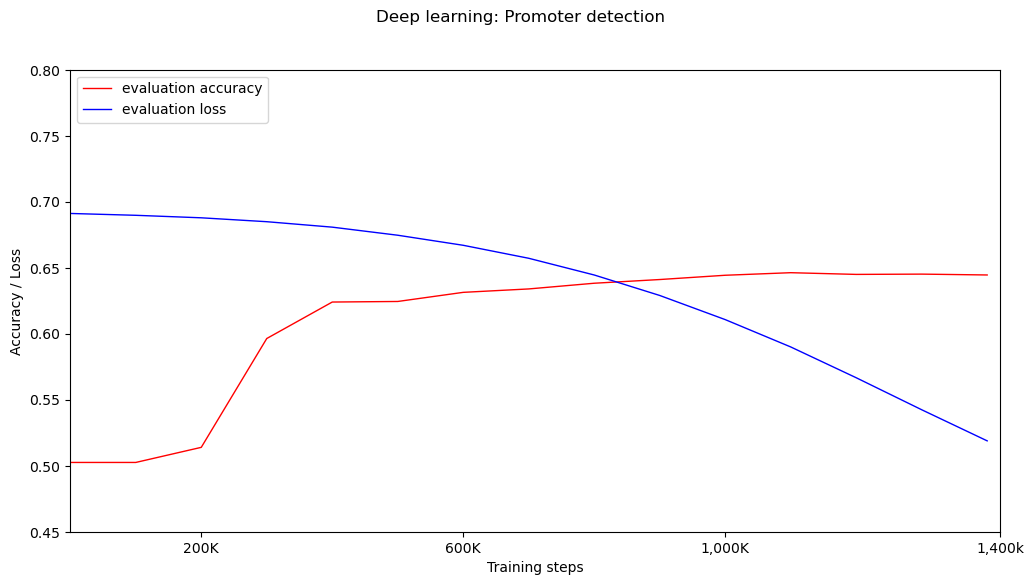

'\nplt.subplots(figsize=(12,6)) # 6 for one row but 12 cause to row\nplt.subplot(1, 2, 1)\n#m = 430/100\n#pointbag_x = range(16, 100)\n#pointbag_y = []\n#for x in pointbag_x:\n#    pointbag_y.append(x*m)\n#plt.plot(pointbag_y, pointbag_x, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)\n#plt.plot(df["step"],df["acc"],linestyle="rl",marker="-", markersize=2, label="Measured", color="red")\n#plt.plot(df["step"],df["acc"],linewidth=1.0, color="green", label="acc")\nplt.plot(df_clean["step"],df_clean["acc"], color="red", label="accuracy", linestyle="-", marker="", markersize=1.0, linewidth=1.0)\nplt.ylim(0, 0.35)\nplt.xlim(0,225000)\n#plt.gca().spines[\'right\'].set_color(\'none\')\n#plt.gca().spines[\'top\'].set_color(\'none\')\n#plt.title("Training tokenizer on varying subset size")\nplt.suptitle(\'Pre-training PlantBERT\')\nplt.ylabel("Accuracy")\nplt.xlabel("Steps")\n#plt.plot(df_rand["step"],df_rand["random_acc"],linewidth=2.5, color="red", 

In [32]:
fig, ax = plt.subplots(figsize=(12,6)) # 6 for one row but 12 cause to row
#plt.subplot(1, 2, 1)
plt.ylim(0.45, 0.8)
plt.xlim(0,1400000)
plt.suptitle('Deep learning: Promoter detection')
plt.ylabel("Accuracy / Loss")
plt.xlabel("Steps")
plt.xticks([200000, 600000, 1000000, 1420000])
lab = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
lab[len(lab)-1] = "1,400k"
ax.set_xticklabels(lab)
plt.legend(loc='upper left')
plt.xlabel("Training steps")
plt.plot(df_clean["step"],df_clean["acc_eval"], color="red", label="evaluation accuracy", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.plot(df_clean["step"],df_clean["loss"],color="blue", label="evaluation loss", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.legend(loc='upper left')
plt.savefig('plot_finetune_deep.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()

"""
plt.subplots(figsize=(12,6)) # 6 for one row but 12 cause to row
plt.subplot(1, 2, 1)
#m = 430/100
#pointbag_x = range(16, 100)
#pointbag_y = []
#for x in pointbag_x:
#    pointbag_y.append(x*m)
#plt.plot(pointbag_y, pointbag_x, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
#plt.plot(df["step"],df["acc"],linestyle="rl",marker="-", markersize=2, label="Measured", color="red")
#plt.plot(df["step"],df["acc"],linewidth=1.0, color="green", label="acc")
plt.plot(df_clean["step"],df_clean["acc"], color="red", label="accuracy", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.ylim(0, 0.35)
plt.xlim(0,225000)
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')
#plt.title("Training tokenizer on varying subset size")
plt.suptitle('Pre-training PlantBERT')
plt.ylabel("Accuracy")
plt.xlabel("Steps")
#plt.plot(df_rand["step"],df_rand["random_acc"],linewidth=2.5, color="red", label="rand_acc")
#plt.plot(df_rand_clean["step"],df_rand_clean["random_acc"], color="green", label="random accuracy", linestyle="-", marker="", markersize=2.0)
plt.xticks([25000, 75000,125000,175000,225000])
plt.legend(loc='upper left')
plt.suptitle('Pre-training phase')
plt.xlabel("Training steps")

plt.subplot(1, 2, 2)
#m2 = 20/15
#pointbag_x2 = range(16, 100)
#pointbag_y2 = []
#for x in pointbag_x2:
#    pointbag_y2.append(x*m2)
#plt.plot(pointbag_y2, pointbag_x2, label = "Expected",linewidth=1.0, color="silver", linestyle="", marker="o", markersize=2.5)
#plt.plot(df2["duration"], df2["tokenizer_lines"],linestyle="",marker="o", markersize=2, label="Measured", color="red")
#plt.plot(df2_clean["step"],df2_clean["loss"],linewidth=1.0, color="blue", label="loss")
plt.plot(df2_clean["step"],df2_clean["loss"],color="blue", label="loss", linestyle="-", marker="", markersize=1.0, linewidth=1.0)
plt.ylim(4, 8)
plt.xlim(0,225000)
#plt.gca().spines['right'].set_color('none')
#plt.gca().spines['top'].set_color('none')
#plt.ylabel("Trained on rows [*100 000]")
plt.ylabel("Loss")
plt.xlabel("Training steps")
#plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.95))
plt.xticks([25000, 75000,125000,175000,225000])
plt.legend(loc='upper left')

plt.savefig('plot_pretrain.png', dpi=200, bbox_inches='tight')
plt.show()
plt.close()
"""